In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

df = pd.read_csv('../data/pancreatic_cancer_structured.csv')
df

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [4]:
df.shape

(590, 14)

In [5]:
print("Tipos de datos por columna:")
df.info()
# con info vemos que tipo de dato estan dentro del dataset

Tipos de datos por columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dty

In [6]:
print("Valores nulos por columna:")
print(df.isnull().sum(), "\n")

Valores nulos por columna:
sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64 



In [5]:
print("Datos")
df.describe()

Datos


,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


In [7]:
# Eliminamos columnas que no nos sean necesarias para el analisis de la predicción. 
# Acá hubo una investigación sobre el tema para decidir que datos son irrelevantes.
df = df.drop(columns=['sample_id','patient_cohort','sample_origin','stage','benign_sample_diagnosis'])
df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,81,F,1,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [8]:
print(df.columns.tolist())

['age', 'sex', 'diagnosis', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']


In [9]:
columnas_a_eliminar = ['sample_id', 'patient_cohort', 'sample_origin', 'stage', 'benign_sample_diagnosis']
columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]
df = df.drop(columns=columnas_existentes)
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())
    else:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].mode()[0])
df.head()



,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,81,F,1,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,51,M,1,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,61,M,1,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,62,M,1,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222


In [10]:
# En la columna de diagnóstico hay 3 tipos de valores que indican que tiene el panciente, el 1 (para un páncreas sano), 
# el 2 (para pacientes que poseen un enfermedad que no termina llegando a ser el cáncer de pacnreas), 
# el 3 (para pacientes con cáncer de pancreas)
# Con esto decidi hacer que para los valores 1 y 2 los cuales no teenen cáncer y el 3 para aquellos que si lo posean.


# Cambiar los valores de diagnóstico los que son 0 son cancer = False y 1 = True.
df['diagnosis'].replace([1,2,3], [0,0,1], inplace=True)
df.head()

C:\Users\ALUMNO.B-22F0486\AppData\Local\Temp\ipykernel_9016\3561880435.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis'].replace([1,2,3], [0,0,1], inplace=True)


,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,81,F,0,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,51,M,0,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,61,M,0,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,62,M,0,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222


In [11]:
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

df = pd.get_dummies(df)
df.head()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,sex_F,sex_M
0,33,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,True,False
1,81,0,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000,True,False
2,51,0,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222,False,True
3,61,0,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222,False,True
4,62,0,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222,False,True


<Axes: xlabel='age'>

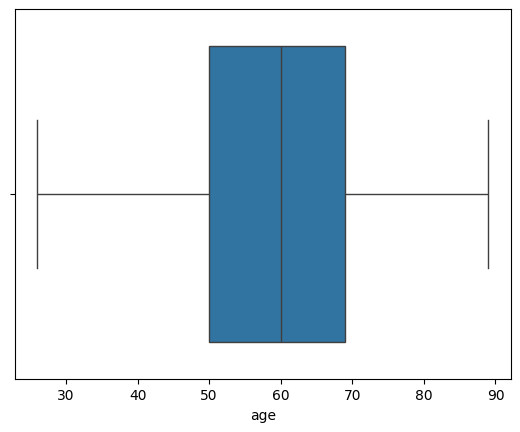

In [12]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(x=df['age'])

<Axes: xlabel='plasma_CA19_9'>

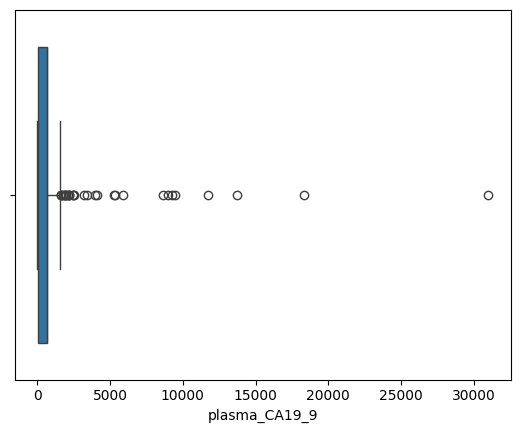

In [14]:
sns.boxplot(x=df['plasma_CA19_9'])

<Axes: ylabel='creatinine'>

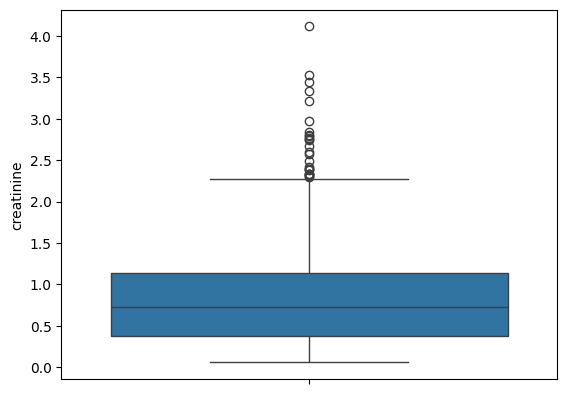

In [15]:
sns.boxplot(y=df['creatinine'])

<Axes: xlabel='LYVE1'>

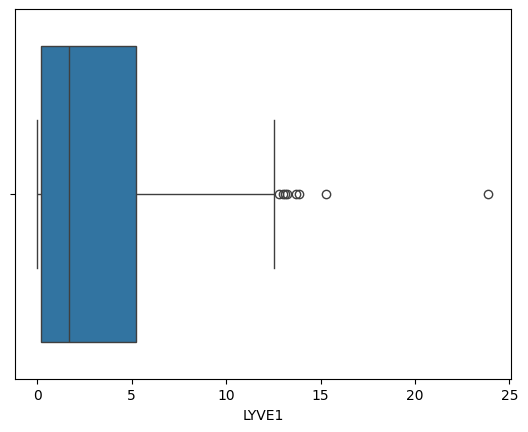

In [12]:
sns.boxplot(x=df['LYVE1'])

<Axes: xlabel='REG1B'>

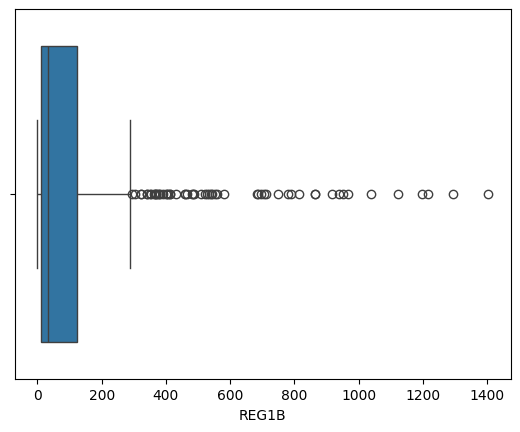

In [13]:
sns.boxplot(x=df['REG1B'])

<Axes: xlabel='REG1A'>

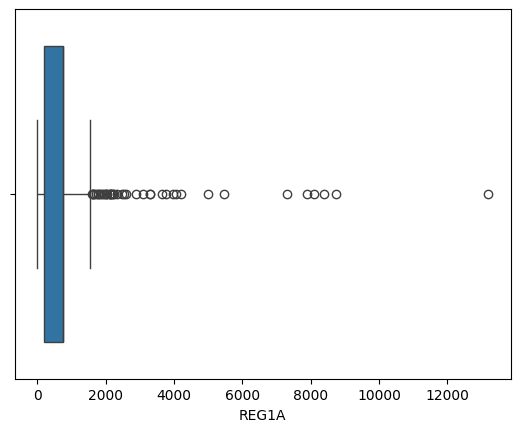

In [14]:
sns.boxplot(x=df['REG1A'])

<Axes: xlabel='TFF1'>

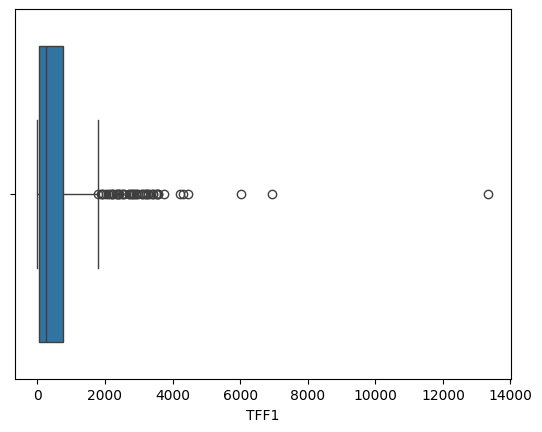

In [15]:
sns.boxplot(x=df['TFF1'])

In [13]:
#https://numpy.org/doc/2.1/reference/generated/numpy.quantile.html
#https://panamahitek.com/identificacion-y-eliminacion-de-outliers-en-machine-learning/ 
columnas_numericas = df.select_dtypes(include='number')

# Calcular los cuartiles  y Rango
primer_cuartilQ1 = columnas_numericas.quantile(0.25)
# También conocido como el cuartil inferior, es el valor que corta el 25% inferior de los datos. Se representa por el borde inferior del cuerpo de la caja.
tercer_cuartilQ3 = columnas_numericas.quantile(0.75)
# También conocido como el cuartil superior, es el valor que corta el 25% superior de los datos. Se representa por el borde superior del cuerpo de la caja.
rangoIQR = tercer_cuartilQ3 - primer_cuartilQ1
#Es la diferencia entre el tercer y el primer cuartil: IQR=Q3−Q1. Representa el rango dentro del cual se encuentra la mitad central de los datos.
# Sacado de los links -->

# Filtrar outliers usando las columnas numéricas
sin_outliers_mask = ~((columnas_numericas < (primer_cuartilQ1 - 1.5 * rangoIQR)) | 
                      (columnas_numericas > (tercer_cuartilQ3 + 1.5 * rangoIQR))).any(axis=1)

new_df = df[sin_outliers_mask]

# Mostrar forma del nuevo DataFrame sin outliers
new_df.shape


(470, 10)

In [14]:
new_df

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,sex_F,sex_M
0,33,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,True,False
1,81,0,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000,True,False
2,51,0,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222,False,True
3,61,0,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222,False,True
4,62,0,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222,False,True
...,...,...,...,...,...,...,...,...,...,...
579,78,1,941.000000,0.46371,1.044345,14.36436,327.397097,646.000000,True,False
585,68,1,654.002944,0.52026,7.058209,156.24100,525.178000,735.281222,False,True
586,71,1,654.002944,0.85956,8.341207,16.91500,245.947000,735.281222,True,False
587,63,1,654.002944,1.36851,7.674707,289.70100,537.286000,735.281222,False,True


In [15]:
n = 500 # Número de muestras para el nuevo dataset
nuevos_datos_para_entrenamineto = pd.DataFrame({
    'age': np.clip(np.random.normal(65, 10, n), 20, 100),
    'plasma_CA19_9': np.clip(np.concatenate([
        np.random.normal(40, 10, int(n*0.9)),       # Ajuste el tema de los datos que se generaban, debido a una investigación del cancer descrubri que había algunos valores lo cuales no 
        np.random.normal(300, 100, int(n*0.1))      # no tenian sentido ya sea que estaban muy bajos o altos, así que ajuste esos valores.
    ]), 0, 1000),
    'creatinine': np.clip(np.random.normal(0.9, 0.2, n), 0.4, 1.5),     # para acordarme np.clip() se usa para limitar eficazmente el rango de sus datos numéricos, garantizando que los valores se mantengan dentro del límite deseado.
    'LYVE1': np.clip(np.random.normal(1.5, 0.3, n), 0.5, 3.0),
    'REG1B': np.clip(np.random.normal(60, 20, n), 10, 150),
    'TFF1': np.clip(np.random.normal(600, 200, n), 100, 1500),
    'REG1A': np.clip(np.random.normal(1200, 400, n), 200, 2500),
    'sex_F': np.random.choice([True, False], n)
})
nuevos_datos_para_entrenamineto['sex_M'] = ~nuevos_datos_para_entrenamineto['sex_F']

# Agrego variables que le faltan al dataset para que la prediccione del cancer sea mas precisa, con datos de analisis medicos
cea = np.concatenate([
    np.random.normal(2, 1, int(n*0.9)),
    np.random.normal(20, 5, int(n*0.1))
])
THBS = np.concatenate([
    np.random.normal(60, 10, int(n*0.9)),
    np.random.normal(120, 15, int(n*0.1))
])
np.random.shuffle(cea)
np.random.shuffle(THBS)
nuevos_datos_para_entrenamineto['CEA'] = np.clip(cea, 0, 50)
nuevos_datos_para_entrenamineto['THBS'] = np.clip(THBS, 20, 200)

nuevos_datos_para_entrenamineto['diagnosis'] = np.random.choice([0, 1], size = n, p = [0.9, 0.1])


In [16]:
# Unimos el dataset original sin los outliers con los nuevos datos generados de entrenamiento.
df_ampliado = pd.concat([new_df, nuevos_datos_para_entrenamineto], ignore_index=True)

cea_simulada = np.random.normal(loc=2.5, scale=1.0, size=len(df_ampliado))
thbs_simulada = np.random.normal(loc=50, scale=10, size=len(df_ampliado))

df_ampliado['CEA'] = df_ampliado['CEA'].mask(df_ampliado['CEA'].isna(), cea_simulada)
df_ampliado['THBS'] = df_ampliado['THBS'].mask(df_ampliado['THBS'].isna(), thbs_simulada)

# Evitamos valores negativos
df_ampliado['CEA'] = df_ampliado['CEA'].clip(lower=0)
df_ampliado['THBS'] = df_ampliado['THBS'].clip(lower=0)
# Normalizamos los datos numéricos para que tengan un rango entre 0 y 1
X = df_ampliado.drop(["diagnosis"], axis=1)
y = df_ampliado["diagnosis"]

x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=60)

print(f"Total de pruebas en todo el dataset: {len(X)}")
print(f"Total de pruebas en el entrenamiento: {len(x_entrenamiento)}")
print(f"Total de pruebas en la prueba: {len(x_prueba)}")

df_ampliado

Total de pruebas en todo el dataset: 970
Total de pruebas en el entrenamiento: 776
Total de pruebas en la prueba: 194


,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,sex_F,sex_M,CEA,THBS
0,33.000000,0,11.700000,1.832220,0.893219,52.948840,654.282174,1262.000000,True,False,2.398873,48.982131
1,81.000000,0,654.002944,0.972660,2.037585,94.467030,209.488250,228.407000,True,False,2.886872,59.012984
2,51.000000,0,7.000000,0.780390,0.145589,102.366000,461.141000,735.281222,False,True,2.510737,43.841066
3,61.000000,0,8.000000,0.701220,0.002805,60.579000,142.950000,735.281222,False,True,2.798268,50.015773
4,62.000000,0,9.000000,0.214890,0.000860,65.540000,41.088000,735.281222,False,True,2.494774,46.024861
...,...,...,...,...,...,...,...,...,...,...,...,...
965,43.406499,0,188.336545,1.282867,1.799939,82.027077,733.872441,702.172058,True,False,1.976240,77.689103
966,50.800641,1,209.740502,0.996890,1.770513,66.451286,425.638868,200.000000,False,True,2.911850,58.147189
967,78.453743,0,321.471983,1.035354,1.446759,52.609274,398.839880,1400.205983,False,True,4.796204,54.150570
968,65.796208,1,397.368448,0.783962,1.331601,13.729207,762.643169,1279.997721,False,True,1.336809,43.117511


In [17]:
Random_forest = RandomForestClassifier(random_state=42)
Random_forest.fit(x_entrenamiento, y_entrenamiento)

y_prediccion_RandomForest = Random_forest.predict(x_prueba)
print("Modelo con Random Forest")
print(confusion_matrix(y_prueba, y_prediccion_RandomForest))
print(classification_report(y_prueba, y_prediccion_RandomForest))

csv_score_RandomForest =  cross_val_score(Random_forest, X, y, cv=5)
print(f"Validación cruzada (RF) - accuracy promedio: {csv_score_RandomForest.mean():.2f}")

Modelo con Random Forest
[[149   5]
 [ 31   9]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       154
           1       0.64      0.23      0.33        40

    accuracy                           0.81       194
   macro avg       0.74      0.60      0.61       194
weighted avg       0.79      0.81      0.78       194

Validación cruzada (RF) - accuracy promedio: 0.86


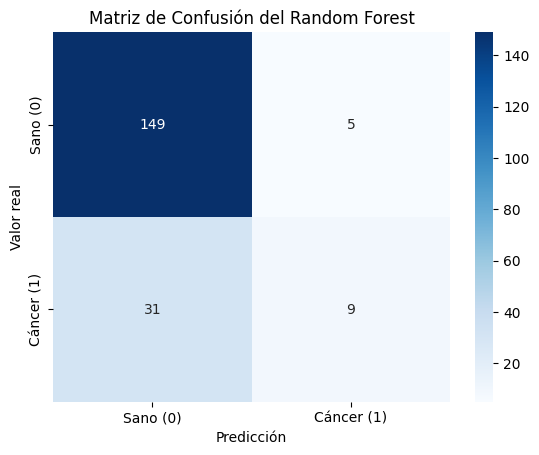

In [18]:
# Matriz de confusión
matriz = confusion_matrix(y_prueba, y_prediccion_RandomForest)

# Etiquetas para el gráfico
etiquetas = ["Sano (0)", "Cáncer (1)"]

# Mppa de calor
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión del Random Forest')
plt.show()


#                0                   1
#
# 0 |   Verdadero Negativo   Falso Positivo 
# 
# 1 |   Falso Negativo       Verdadero Positivo

In [20]:
# XGBoost Classifier
modelo_xgb = XGBClassifier(eval_metric='logloss')
modelo_xgb.fit(x_entrenamiento, y_entrenamiento)
y_pred_xgb = modelo_xgb.predict(x_prueba)
print("\nModelo con XGBoost")
print(confusion_matrix(y_prueba, y_pred_xgb))
print(classification_report(y_prueba, y_pred_xgb))
csv_score_xgb = cross_val_score(modelo_xgb, X, y, cv=5)
print(f"Validación cruzada (XGB) - accuracy promedio: {csv_score_xgb.mean():.2f}")



Modelo con XGBoost
[[145   9]
 [ 25  15]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       154
           1       0.62      0.38      0.47        40

    accuracy                           0.82       194
   macro avg       0.74      0.66      0.68       194
weighted avg       0.81      0.82      0.81       194

Validación cruzada (XGB) - accuracy promedio: 0.85


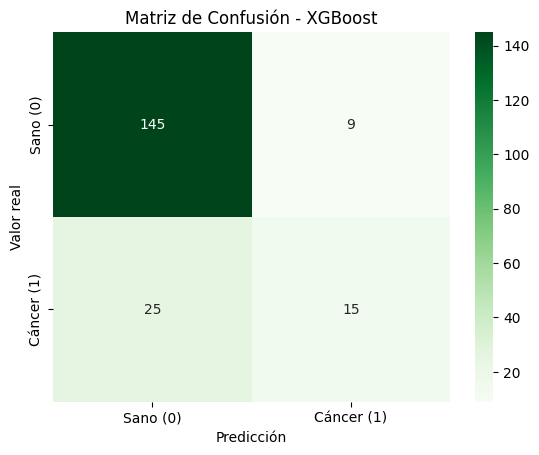

In [21]:
# Obtener predicciones de XGBoost
y_prediccion_XGB = modelo_xgb.predict(x_prueba)

# Calcular la matriz
matriz_xgb = confusion_matrix(y_prueba, y_prediccion_XGB)

# Etiquetas
etiquetas = ["Sano (0)", "Cáncer (1)"]

# Graficar matriz de confusión
sns.heatmap(matriz_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - XGBoost')
plt.show()

In [33]:
# Prueba de este modle de Random Forest

nuevo_paciente = pd.DataFrame([{
    'age': 100,
    'plasma_CA19_9': 11.700000,
    'creatinine': 0.4,
    'LYVE1':1.8,
    'REG1B': 64,
    'TFF1': 622,
    'REG1A': 1220,
    'CEA': 2.551159,
    'THBS': 64.709188,
    'sex_F': True,
    'sex_M': False
}])

nuevo_paciente = nuevo_paciente[x_entrenamiento.columns]
prediccion = Random_forest.predict(nuevo_paciente)
print("Resultado:", "Positivo para cáncer" if prediccion[0] == 1 else "Negativo para cáncer")


Resultado: Negativo para cáncer


Distribución de clases en 'diagnosis:
etiqueta_diagnostico
Sano    199
Name: count, dtype: int64 



C:\Users\pc\AppData\Local\Temp\ipykernel_18708\3488202724.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="etiqueta_diagnostico", palette="pastel", order=orden_clases)


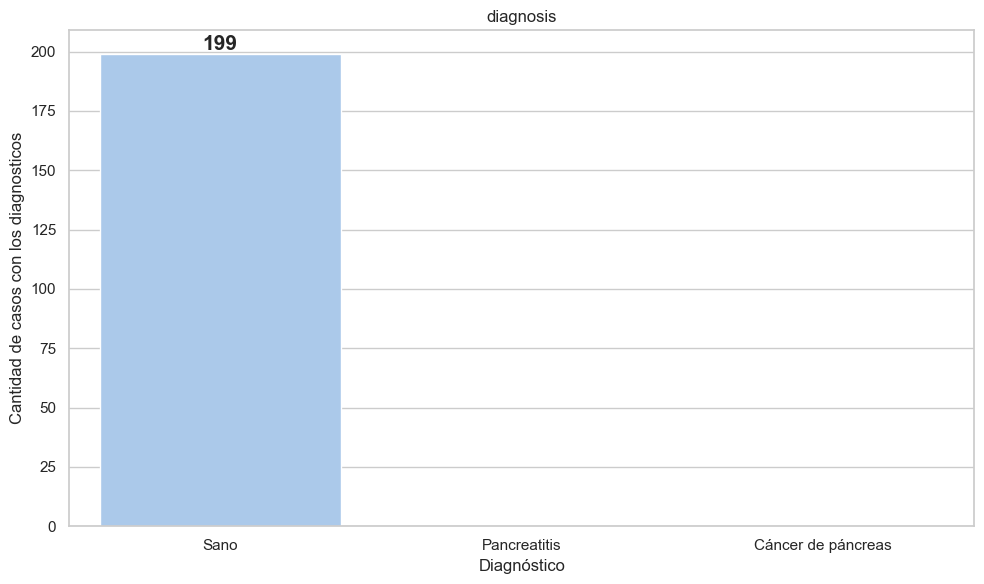

In [23]:
if 'Diagnosis' in df.columns or 'diagnosis' in df.columns:
    objetivo = 'Diagnosis' if 'Diagnosis' in df.columns else 'diagnosis'
    
    # Mapeo de valores numéricos a etiquetas comprensibles
    etiquetas = {
        1: "Sano",
        2: "Pancreatitis",
        3: "Cáncer de páncreas"
    }

    # Crear una nueva columna con las etiquetas
    df["etiqueta_diagnostico"] = df[objetivo].map(etiquetas)
    
    # mostramos la cantidad exacta de casa diagnostico con su etiqueta correspondiente
    print(f"Distribución de clases en '{objetivo}:")
    print(df["etiqueta_diagnostico"].value_counts(), "\n")

    orden_clases = ["Sano", "Pancreatitis", "Cáncer de páncreas"]

    # Crear el gráfico
    ax = sns.countplot(data=df, x="etiqueta_diagnostico", palette="pastel", order=orden_clases)
    plt.title(f"{objetivo}")
    plt.xlabel("Diagnóstico")
    plt.ylabel("Cantidad de casos con los diagnosticos")

    # Mostrar el número exacto arriba de cada barra
    for p in ax.patches:
        altura = p.get_height()
        ax.annotate(f"{int(altura)}", (p.get_x() + p.get_width() / 2, altura),
                    ha='center', va='bottom', fontsize=15, fontweight='bold')

    plt.tight_layout()
    plt.show()
# Revisamos si en la tabla de datos hay una columna que diga si una persona tiene cáncer o no, y si la encuentra Cuenta cuántas personas tienen cáncer y cuántas no, 
# además de hacer un gráfico de barras para que se vea claro. 
# Este gráfico de barras muestra cuántas personas hay en cada grupo de diagnóstico, que es la variable objetivo del proyecto (es decir, lo que queremos predecir: el tipo de diagnóstico).

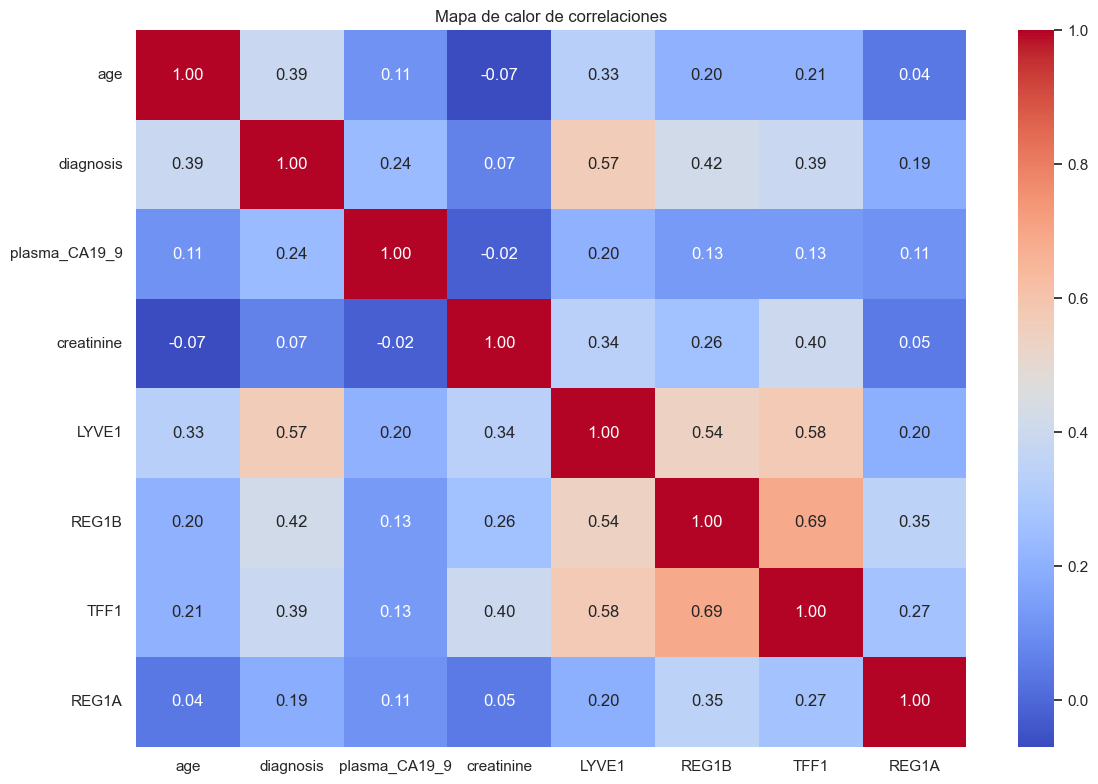

In [34]:
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
if len(numerical_cols) > 1:
    corr = df[numerical_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Mapa de calor de correlaciones")
    plt.tight_layout()
    plt.show()